## Introduction

The aim of this project is to predict car accident severity. The data has been taken from the Traffic Records Group, Traffic Management Division, Seattle Department of Transportation. It comprises of all collisions and crashes that have occurred in the state from 2004 to 2019.The data has the key information that include Severity of the accident, Incident Date, number of vehicles and persons involved in accidents, Road type and conditions, Weather and light conditions.

### Reading Data

In [2]:
import pandas as pd
data = pd.read_csv("C:\\Users\\sswarupa\\Documents\\GitHub\\CarAccidentSeverity\\Data-Collisions.csv", low_memory=False)
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Checking Data Type of the variables

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

There are 194673 rows and 38 columns. There are several variables in the dataset which looks like are ids and not useful for our model.

### Checking count of unique values of each variables

In [4]:
counts = data.nunique()
counts

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE            63
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

### Removing the variables not useful for the model

In [5]:
colli = data.iloc[:,[0,8,15,20,22,27,28,29,37]]


In [6]:
colli.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INCDATE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Intersection,Angles,2013/03/27 00:00:00+00,At Intersection (intersection related),Overcast,Wet,Daylight,N
1,1,Block,Sideswipe,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N
2,1,Block,Parked Car,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N
3,1,Block,Other,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),Clear,Dry,Daylight,N
4,2,Intersection,Angles,2004/01/28 00:00:00+00,At Intersection (intersection related),Raining,Wet,Daylight,N


I chose the severity of the accidents as the dependent variable. 
SEVERITYCODE is a categorical variable and follows a code that corresponds to the severity of the collision: 2 (injury) and 1 (property damage).
I chose 8 attributes from the 37 available in the dataset: address type, collision type, incdate, junction type, weather, road condition, light condition and hit parked car

### Checking for any missing values

In [7]:
#Checking for the null values
colli.isnull().sum()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
INCDATE             0
JUNCTIONTYPE     6329
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
HITPARKEDCAR        0
dtype: int64

### Removing rows with any missing values

In [8]:
# using dropna() function  
mod_colli = colli.dropna(axis=0, how='any')

Removed rows with any missing values. 11,778 rows were deleted.

### Checking the final dataset before Data Analysis and building models

In [9]:
mod_colli.shape

(182895, 9)

In [10]:
#Checking for the null values once again
mod_colli.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
INCDATE          0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dtype: int64

The final dataset has 182895 rows, 9 columns and there are no missing values

## Data Analysis

### Checking the target variable

1    126270
2     56625
Name: SEVERITYCODE, dtype: int64

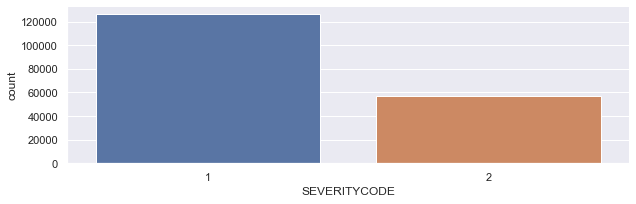

In [11]:
#Checking the target variable
import seaborn as sns
sns.set()
sns.catplot(x='SEVERITYCODE', kind='count', data=mod_colli, height=3, aspect=3)

mod_colli['SEVERITYCODE'].value_counts()


The target data looks imbalanced, however there are sufficient rows with SEVERITYCODE 2 to train the model. There are 12K rows with SEVERITYCODE 1 and only 5K rows with SEVERITYCODE 2. I tried balancing the target by simple random sampling however it did not help in improving the accuracy so excluding that step.

### Plotting features by Severity Code

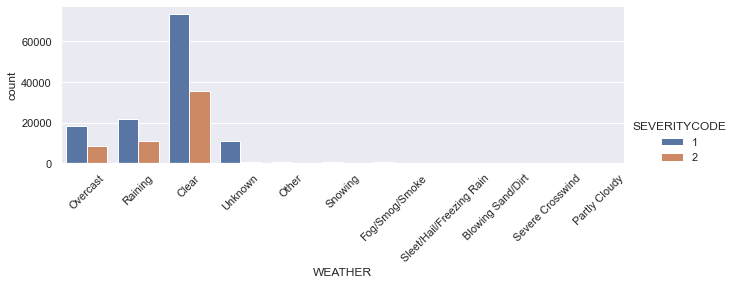

In [13]:
#Plotting Weather by Severity
import seaborn as sns
import matplotlib.pyplot as plt
chart = sns.catplot(x='WEATHER', kind='count', hue='SEVERITYCODE', data=mod_colli, height=3, aspect=3)
chart.set_xticklabels(rotation=45)
plt.show()

Most of the accidents happened with weather type clear, raining and overcast.

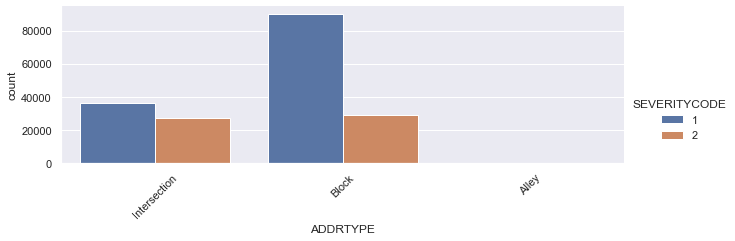

In [14]:
#Plotting Address type by Severity
import seaborn as sns
chart = sns.catplot(x='ADDRTYPE', kind='count', hue='SEVERITYCODE', data=mod_colli, height=3, aspect=3)
chart.set_xticklabels(rotation=45)
plt.show()

Most of the accidents happened on the block however the proportion of severity code 2 is significantly high on intersection.

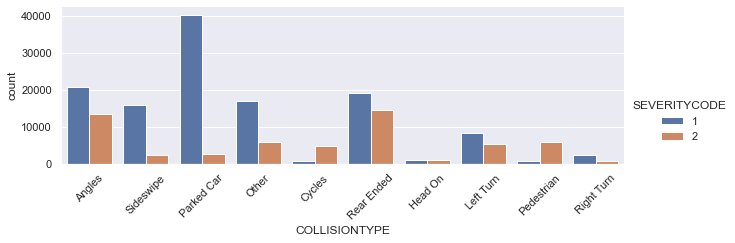

In [15]:
#Plotting Collision type by Severity
import seaborn as sns
chart = sns.catplot(x='COLLISIONTYPE', kind='count', hue='SEVERITYCODE', data=mod_colli, height=3, aspect=3)
chart.set_xticklabels(rotation=45)
plt.show()

Most of the accidents happened with collision type parked car howevet they are mostly severity code 1. Most of the severity code 2 accidents happened with collision type rear ended and Angles.

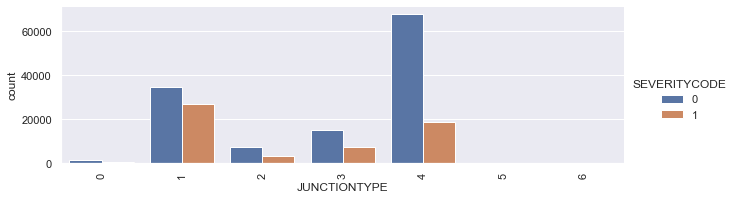

In [40]:
#Plotting Junction type by Severity
import seaborn as sns
chart = sns.catplot(x='JUNCTIONTYPE', kind='count', hue='SEVERITYCODE', data=mod_colli, height=3, aspect=3)
chart.set_xticklabels(rotation=90)
plt.show()

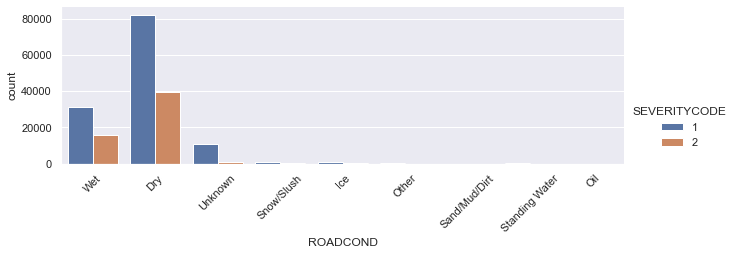

In [17]:
#Plotting Raod Condition by Severity
import seaborn as sns
chart = sns.catplot(x='ROADCOND', kind='count', hue='SEVERITYCODE', data=mod_colli, height=3, aspect=3)
chart.set_xticklabels(rotation=45)
plt.show()

Most of the accidents hapened on wet and dry road conditions suggesting that traffic must be low on the riskier conditions.

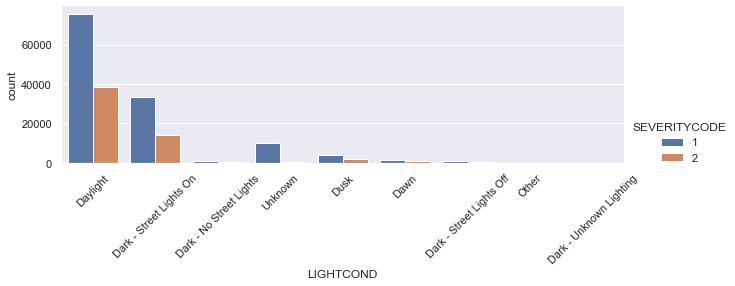

In [18]:
#Plotting Light Condition by Severity
import seaborn as sns
chart = sns.catplot(x='LIGHTCOND', kind='count', hue='SEVERITYCODE', data=mod_colli, height=3, aspect=3)
chart.set_xticklabels(rotation=45)
plt.show()

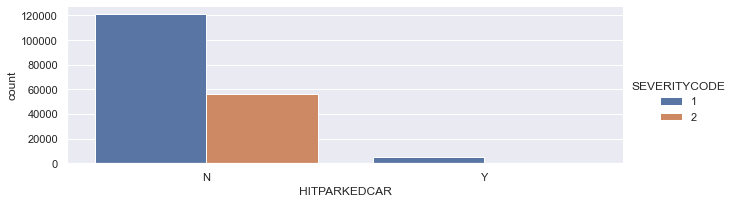

In [20]:
#Plotting Hit Parked car by Severity
import seaborn as sns
chart = sns.catplot(x='HITPARKEDCAR', kind='count', hue='SEVERITYCODE', data=mod_colli, height=3, aspect=3)
plt.show()

Most of the accidents happened when the HITPARKEDCAR type 'N'. 

In [21]:
mod_colli['INCMONTH'] = pd.DatetimeIndex(mod_colli['INCDATE']).month

del mod_colli['INCDATE']
mod_colli.head()

C:\Users\sswarupa\AppData\Local\Temp\1/ipykernel_72420/1624185704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_colli['INCMONTH'] = pd.DatetimeIndex(mod_colli['INCDATE']).month


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,INCMONTH
0,2,Intersection,Angles,At Intersection (intersection related),Overcast,Wet,Daylight,N,3
1,1,Block,Sideswipe,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N,12
2,1,Block,Parked Car,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N,11
3,1,Block,Other,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,3
4,2,Intersection,Angles,At Intersection (intersection related),Raining,Wet,Daylight,N,1


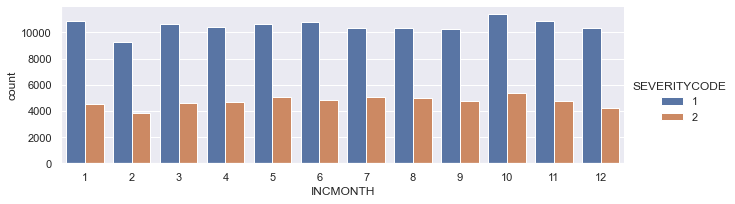

In [23]:
#Plotting Incident Month by Severity
import seaborn as sns
chart = sns.catplot(x='INCMONTH', kind='count', hue='SEVERITYCODE', data=mod_colli, height=3, aspect=3)
plt.show()

Plotted month of the incident to see if there is any seasonal pattern however doesn't look like there is any seasonal pattern.

## Data Transformation

### Encoding the features into numerical values

In [24]:
##Encoding the features into numerical values
from sklearn import preprocessing

severity = preprocessing.LabelEncoder()
severity.fit(mod_colli['SEVERITYCODE'])
mod_colli['SEVERITYCODE'] = severity.transform(mod_colli['SEVERITYCODE'])

addrtype = preprocessing.LabelEncoder()
severity.fit(mod_colli['ADDRTYPE'])
mod_colli['ADDRTYPE'] = severity.transform(mod_colli['ADDRTYPE'])

collisiontype = preprocessing.LabelEncoder()
severity.fit(mod_colli['COLLISIONTYPE'])
mod_colli['COLLISIONTYPE'] = severity.transform(mod_colli['COLLISIONTYPE'])

junctiontype = preprocessing.LabelEncoder()
severity.fit(mod_colli['JUNCTIONTYPE'])
mod_colli['JUNCTIONTYPE'] = severity.transform(mod_colli['JUNCTIONTYPE'])

weather = preprocessing.LabelEncoder()
severity.fit(mod_colli['WEATHER'])
mod_colli['WEATHER'] = severity.transform(mod_colli['WEATHER'])

roadcond = preprocessing.LabelEncoder()
severity.fit(mod_colli['ROADCOND'])
mod_colli['ROADCOND'] = severity.transform(mod_colli['ROADCOND'])

lightcond = preprocessing.LabelEncoder()
severity.fit(mod_colli['LIGHTCOND'])
mod_colli['LIGHTCOND'] = severity.transform(mod_colli['LIGHTCOND'])

hitparkedcar = preprocessing.LabelEncoder()
severity.fit(mod_colli['HITPARKEDCAR'])
mod_colli['HITPARKEDCAR'] = severity.transform(mod_colli['HITPARKEDCAR'])

incmonth = preprocessing.LabelEncoder()
severity.fit(mod_colli['INCMONTH'])
mod_colli['INCMONTH'] = severity.transform(mod_colli['INCMONTH'])

mod_colli.head()


C:\Users\sswarupa\AppData\Local\Temp\1/ipykernel_72420/2708988249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_colli['SEVERITYCODE'] = severity.transform(mod_colli['SEVERITYCODE'])
C:\Users\sswarupa\AppData\Local\Temp\1/ipykernel_72420/2708988249.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_colli['ADDRTYPE'] = severity.transform(mod_colli['ADDRTYPE'])
C:\Users\sswarupa\AppData\Local\Temp\1/ipykernel_72420/2708988249.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,INCMONTH
0,1,2,0,1,4,8,5,0,2
1,0,1,9,4,6,8,2,0,11
2,0,1,5,4,4,0,5,0,10
3,0,1,4,4,1,0,5,0,2
4,1,2,0,1,6,8,5,0,0


As we can see above that all categorical variables are now converted into numerical values.

## Understanding the Correlation between variables

In [25]:
#Understanding the Correlation between variables
mod_colli.corr()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,INCMONTH
SEVERITYCODE,1.000000,0.192744,-0.127117,-0.200887,-0.090768,-0.037238,-0.042661,-0.092478,0.005963
ADDRTYPE,0.192744,1.000000,-0.479831,-0.919606,-0.071629,-0.019876,-0.035628,-0.118982,-0.000107
COLLISIONTYPE,-0.127117,-0.479831,1.000000,0.480055,0.022379,-0.004626,0.027400,0.033586,0.008729
JUNCTIONTYPE,-0.200887,-0.919606,0.480055,1.000000,0.085224,0.027795,0.030827,0.143587,0.007152
WEATHER,-0.090768,-0.071629,0.022379,0.085224,1.000000,0.749401,0.159869,0.033383,0.015249
ROADCOND,-0.037238,-0.019876,-0.004626,0.027795,0.749401,1.000000,-0.006152,0.005173,0.019777
LIGHTCOND,-0.042661,-0.035628,0.027400,0.030827,0.159869,-0.006152,1.000000,0.012456,-0.026348
HITPARKEDCAR,-0.092478,-0.118982,0.033586,0.143587,0.033383,0.005173,0.012456,1.000000,0.005310
INCMONTH,0.005963,-0.000107,0.008729,0.007152,0.015249,0.019777,-0.026348,0.005310,1.000000


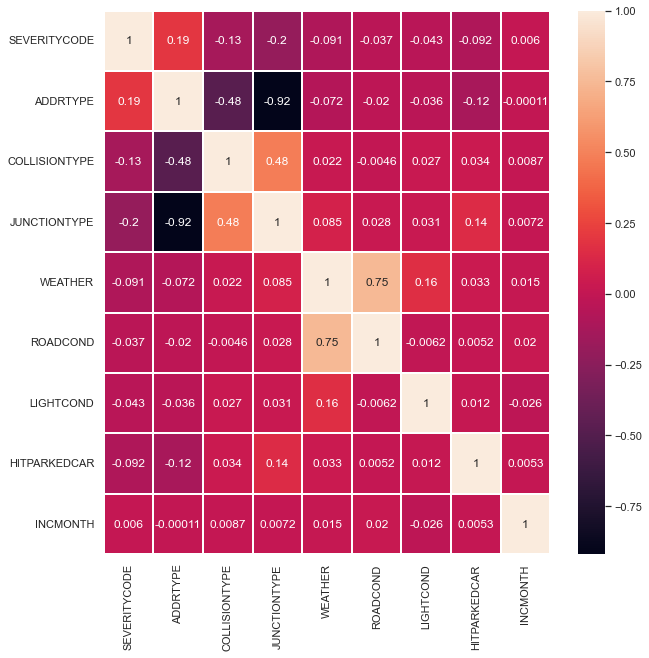

In [41]:
#Correlation Plot
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(mod_colli.corr(), annot = True, linewidth=.2, cbar_kws={"shrink":1})
plt.show()

## Splitting Data into Training and Test datset

In [29]:
#Splitting Data into Training and Test 
from sklearn.model_selection import train_test_split
X = mod_colli.iloc[:,[1,2,3,4,5,6,7,8]]
y = mod_colli.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (128026, 8) (128026,)
Test set: (54869, 8) (54869,)


## KNN Model

### Building Model

In [30]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

#Training
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting on the test dataset

In [31]:
# Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

Train set Accuracy:  0.7317576117351163
Test set Accuracy:  0.7161056334177769


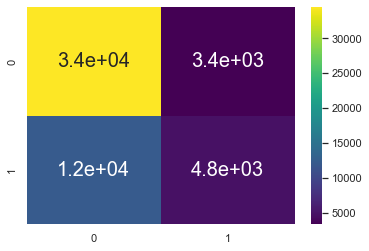

              precision    recall  f1-score   support

           0       0.74      0.91      0.82     37859
           1       0.59      0.28      0.38     17010

    accuracy                           0.72     54869
   macro avg       0.66      0.60      0.60     54869
weighted avg       0.69      0.72      0.68     54869



In [32]:
# Accuracy Evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
con_mat=confusion_matrix(y_test,yhat)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()

print(classification_report(y_test, yhat))

Train Accuracy: 0.7346085951291144
Test Accuracy: 0.7207348411671436


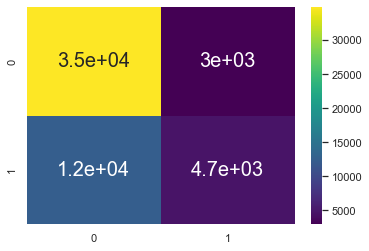

              precision    recall  f1-score   support

           0       0.74      0.92      0.82     37859
           1       0.61      0.27      0.38     17010

    accuracy                           0.72     54869
   macro avg       0.67      0.60      0.60     54869
weighted avg       0.70      0.72      0.68     54869



In [33]:
#Lets try with K=6
k2 = 6
n2 = KNeighborsClassifier(n_neighbors=k2).fit(X_train,y_train)
n2
yhat2 = n2.predict(X_test)
yhat2[0:5]
print("Train Accuracy:",metrics.accuracy_score(y_train,n2.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test,yhat2))

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
con_mat=confusion_matrix(y_test,yhat2)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()

print(classification_report(y_test, yhat2))

### Finding Optimal Value of K in KNN

In [37]:
#Finding Optimal Value of K in KNN
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

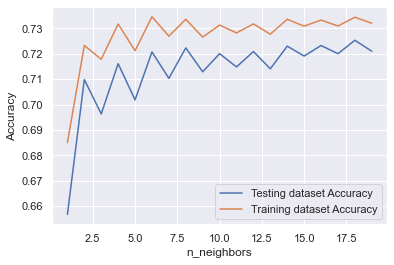

In [38]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### Final Model with K=8

Train Accuracy: 0.7336166091262712
Test Accuracy: 0.7223204359474384


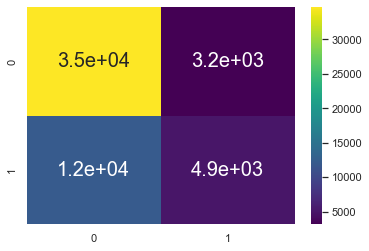

              precision    recall  f1-score   support

           0       0.74      0.92      0.82     37859
           1       0.61      0.29      0.39     17010

    accuracy                           0.72     54869
   macro avg       0.68      0.60      0.61     54869
weighted avg       0.70      0.72      0.69     54869



In [39]:
#Lets try with K=8
k4 = 8
n4 = KNeighborsClassifier(n_neighbors=k4).fit(X_train,y_train)
n4
yhat4 = n4.predict(X_test)
yhat4[0:5]
print("Train Accuracy:",metrics.accuracy_score(y_train,n4.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test,yhat4))

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
con_mat=confusion_matrix(y_test,yhat4)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()

print(classification_report(y_test, yhat4))

### KNN model with K vlaue of 8 is the best KNN model with accuracy of .7223 on the test dataset.